# Imports

In [1]:
import torch
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from preprocess import get_loaders
from cnn import CNN  # Import your CNN model class

/Users/michael/Desktop/Me/tnt_cnn/src/preprocess.py:99: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  inputs, targets = torch.load(save_path)


Preprocessed data loaded from ../data/preprocessed_data.pt
Epoch 1/10, Loss: 1.0940
Epoch 2/10, Loss: 0.9792
Epoch 3/10, Loss: 0.9397
Epoch 4/10, Loss: 0.9202
Epoch 5/10, Loss: 0.9043
Epoch 6/10, Loss: 0.8913
Epoch 7/10, Loss: 0.8793
Epoch 8/10, Loss: 0.8697
Epoch 9/10, Loss: 0.8632
Epoch 10/10, Loss: 0.8555
Validation Accuracy: 64.04%


# parameters

In [2]:
save_path = "../data/preprocessed_data.pt"
batch_size = 16

# Load Data Loaders

In [3]:
train_loader, val_loader = get_loaders(save_path, batch_size)

Preprocessed data loaded from ../data/preprocessed_data.pt


/Users/michael/Desktop/Me/tnt_cnn/src/preprocess.py:99: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  inputs, targets = torch.load(save_path)


# Load the trained model

In [4]:
model = CNN()
model.load_state_dict(torch.load("emg_cnn_model.pth"))
model.eval()  # Set to evaluation mode

/var/folders/jw/v8shwtz17156gq98cd34sw180000gn/T/ipykernel_46035/1128115832.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("emg_cnn_mod

CNN(
  (conv1): Conv1d(8, 16, kernel_size=(3,), stride=(1,), padding=(1,))
  (conv2): Conv1d(16, 32, kernel_size=(3,), stride=(1,), padding=(1,))
  (fc1): Linear(in_features=1152, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=8, bias=True)
)

# Evaluate on validation data

In [5]:
all_labels = []
all_predictions = []

with torch.no_grad():
    for inputs, labels in val_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)  # Get predicted class
        all_labels.extend(labels.numpy())
        all_predictions.extend(predicted.numpy())

# Classification report

In [6]:
print("Classification Report:")
print(classification_report(all_labels, all_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.94      0.78     15190
           1       0.00      0.00      0.00      1410
           2       0.53      0.27      0.36      1336
           3       0.48      0.16      0.23      1432
           4       0.56      0.16      0.25      1348
           5       0.45      0.10      0.16      1376
           6       0.57      0.11      0.18      1376

    accuracy                           0.66     23468
   macro avg       0.47      0.25      0.28     23468
weighted avg       0.59      0.66      0.58     23468



/Users/michael/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/michael/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/michael/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

# Confusion matrix

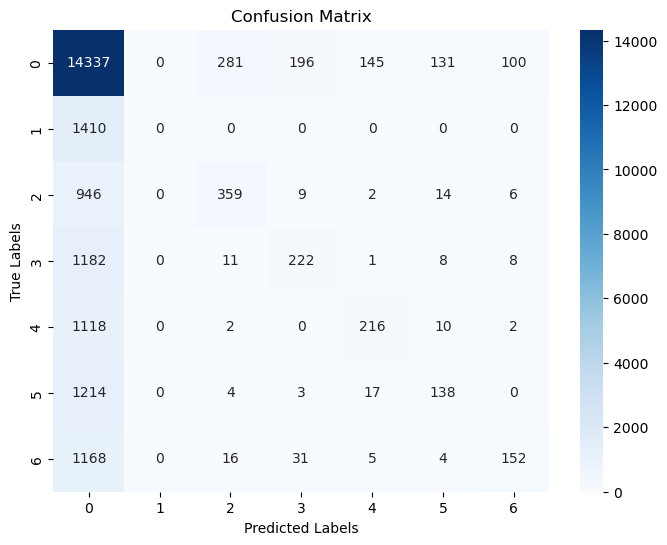

In [7]:
cm = confusion_matrix(all_labels, all_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(7), yticklabels=range(7))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Overall accuracy

In [8]:
correct = sum(1 for true, pred in zip(all_labels, all_predictions) if true == pred)
total = len(all_labels)
accuracy = 100 * correct / total
print(f"Validation Accuracy: {accuracy:.2f}%")


Validation Accuracy: 65.72%
